<a href="https://colab.research.google.com/github/Miriamlh/Accelerated_Advanced_Python_weeks3_4/blob/master/MLH_Machine_Learning_Assignment_2_fi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**MACHINE LEARNING ASSIGNMENT 2**
##Activity Supervised Learning
##Subject: Machine Learning - MSc. Computational Biology
##Miriam López Hinojosa

# Introduction
Computational biology involves the development and application of data-analytics and 
theoretical methods, mathematical modelling and computational simulation techniques to the 
study of biological systems. It also includes many aspects of bioinformatics and can be defined 
as the science of using biological data to develop algorithms or models in order to understand 
biological systems and its relationships. Within this area it is included the sub-area of 
computational oncology that focuses on determining the characteristics of tumors, analyzing 
molecules that are deterministic in causing cancer, and understanding how the human genome 
relates to the causation of tumors and cancer. The last is the context of this activity where you 
have to find the best model that relates some genetics characteristics with the good or bad 
response to a treatment in a cancer scenario.

# Description
Colorectal cancer (CRC) is one of the principal causes of death and its early diagnosis and 
treatment can lead to a full recovery. It is also known that different individual response 
differently to the treatment due to its genetic information. The data for this activity contains 
information ('MM','WW','WM') of different SNPs (Single-Nucleotide polymorphism) from 
different individuals that have been diagnosed with rectal colon cancer and the categorization 
of them based on its good response (R) or bad response to the treatment (NR). The datasets are 
included in this activity and numbered from 1 to 33 and you have to select your assigned dataset
to do the activity. You can find the list of the assigned datasets in the StudentsDatasets.pdf file.
The dataset contains 53 individuals (rows), 21 features (associated to different SNPs), and 1 
target value (‘Target’). The values of the data files are already transformed to 0 for ‘MM’, 1 for 
‘WW’ and 2 for ‘WM’ values in order to be compatible with all the ML learning models format.

# Objectives: 
You have to develop a machine learning model that is able to classify if an individual will 
response well or bad to the treatment based on its SNPs information using the assigned dataset (dataset15).

#TO-DO
- Make a comparative study using the different machine learning classifiers that you have 
seen in class (Logistic Regression, Decision Trees, KNN, Random Forest, and Multilayer 
Perceptron) in the subject and obtain the best possible model (adjust the parameters of 
the models using cross-validation or any other validation method that you have seen as 
needed).
- Explain the results obtained (incude a table with the results for all the models), what is the 
best model, and interpret the results including any ideas to improve the results. 
- Interpret the learned models for regression and decisión trees.

###IMPORT DEPENDENCIES

In [ ]:
# Import dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn import model_selection


In [ ]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

In [ ]:
import matplotlib.image as mpimg
import math
from sklearn.neural_network import MLPClassifier


### LOAD DATA

In [ ]:
# Load the data.
df = pd.read_csv('/content/dataset15.csv')

# Print the data table.
df.head(10)

,Unnamed: 0,Target,n_rs3188513,n_rs9960669,n_rs2602,n_rs5445365,n_rs133061,n_rs10102851,n_rs8375668,n_rs3015353,...,n_rs9280789,n_rs2515462,n_rs9025039,n_rs94282819,n_rs344903,n_rs0370,n_rs9072249,n_rs0220,n_rs833068,n_rs933069
0,0,R,0,0,2,0,1,2,1,1,...,2,0,0,1,2,2,0,0,2,2
1,1,R,0,1,1,2,0,2,0,0,...,0,0,0,1,2,2,1,0,1,1
2,2,R,1,2,2,0,0,0,0,1,...,2,0,0,2,1,1,0,1,0,0
3,3,R,0,2,2,1,1,2,1,0,...,0,0,2,2,2,0,2,0,0,1
4,4,R,0,2,2,0,0,2,0,1,...,1,1,2,2,2,2,2,1,0,1
5,5,R,1,1,0,0,0,2,2,3,...,1,2,2,2,1,2,0,0,1,1
6,6,R,1,2,0,2,1,2,0,0,...,2,1,1,1,1,0,2,0,1,1
7,7,R,0,2,1,0,0,2,0,0,...,2,0,2,2,2,2,1,0,0,0
8,8,R,0,2,0,2,1,2,0,0,...,2,0,1,0,2,0,1,2,1,0
9,9,R,1,0,1,2,0,2,0,0,...,2,1,1,1,2,1,2,0,2,2


###PREPROCESSING THE DATASET
Preprocessing the dataset is a very important part of the analysis, it is used to remove outliers and duplicates from the dataset

In [ ]:
sum(df.duplicated())


0

We notice that we have no duplicate columns in our database so we can continue with the analysis.

###PLOT THE DATA
Let's plot histograms to understand the values of each variable

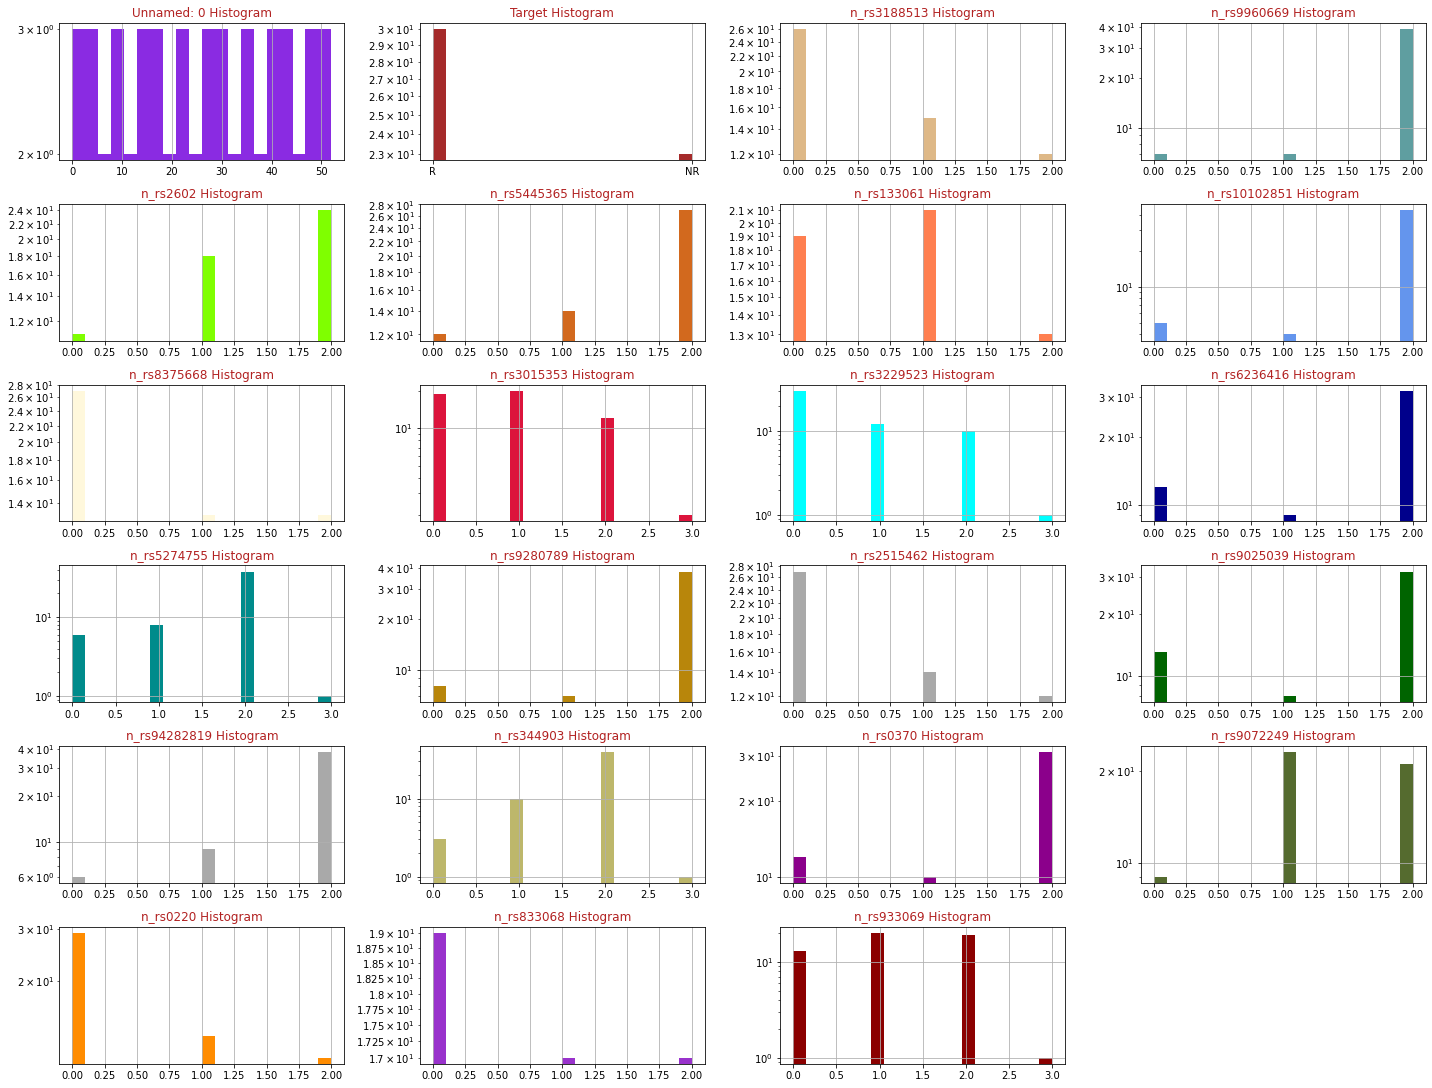

In [ ]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

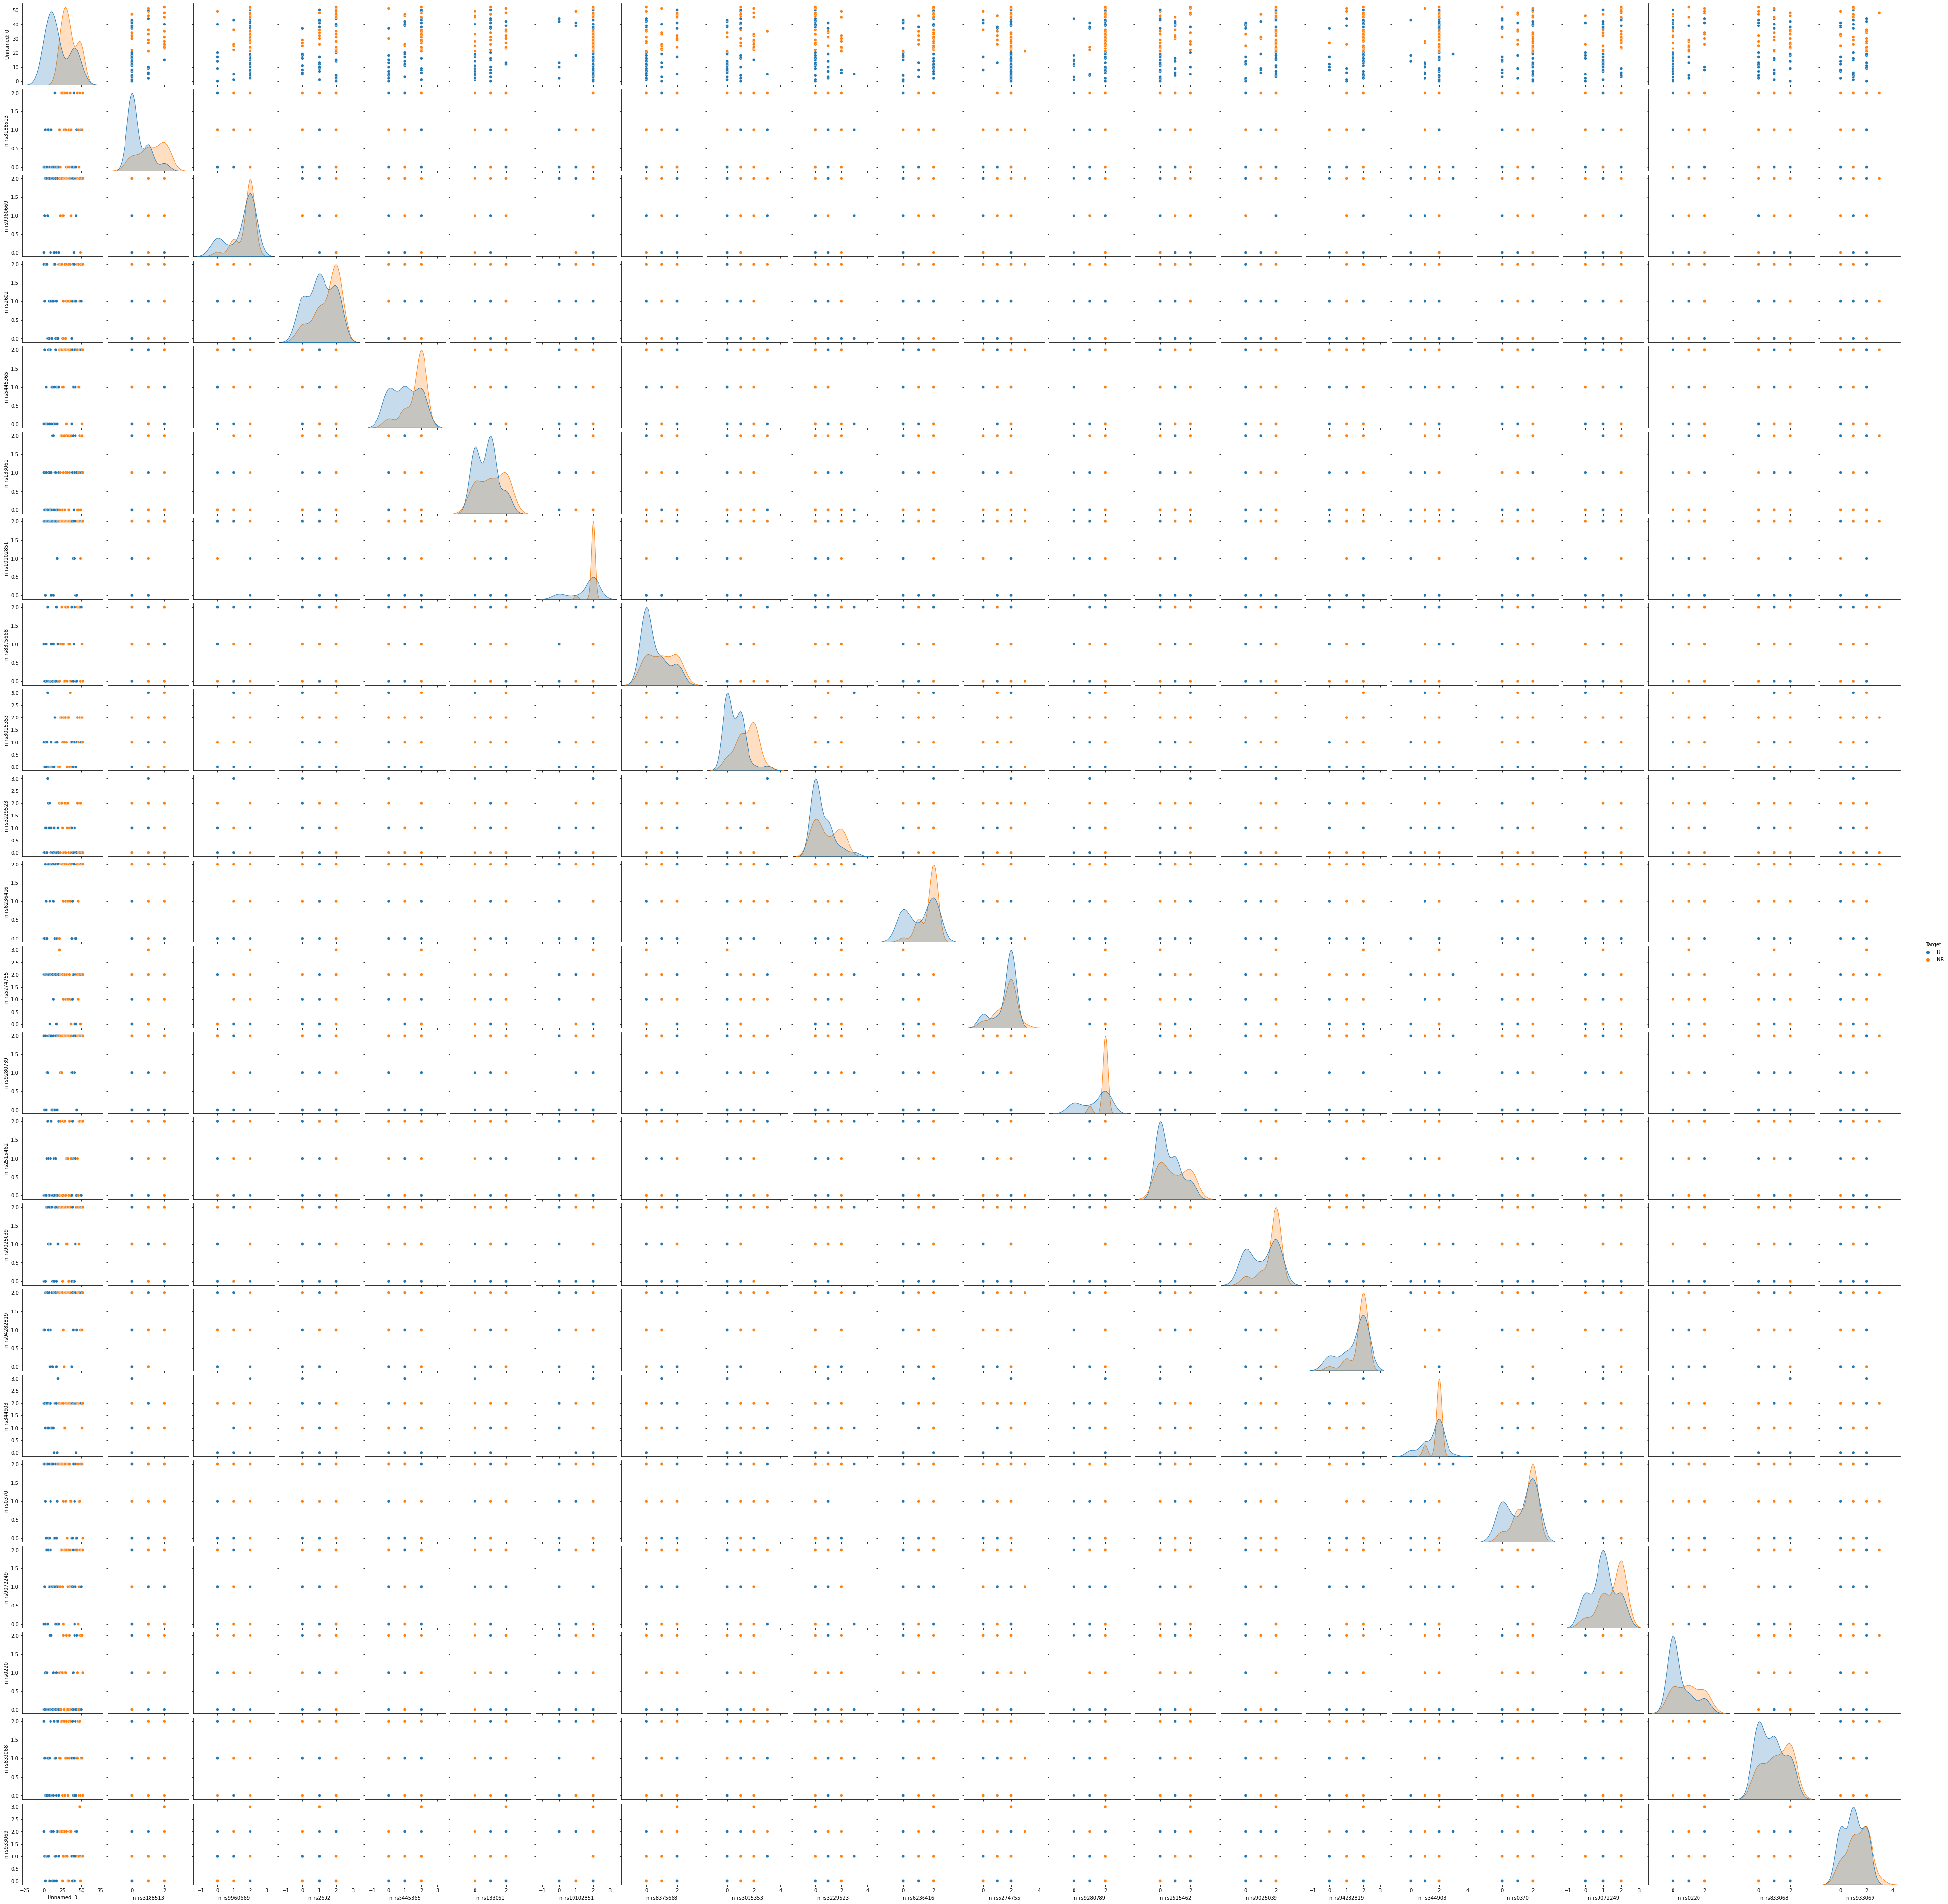

In [ ]:
sns.pairplot(data=df, hue='Target')
plt.show()

Next we will observe the dependence of the variables on each other by studying their correlation from Heatmaps. 

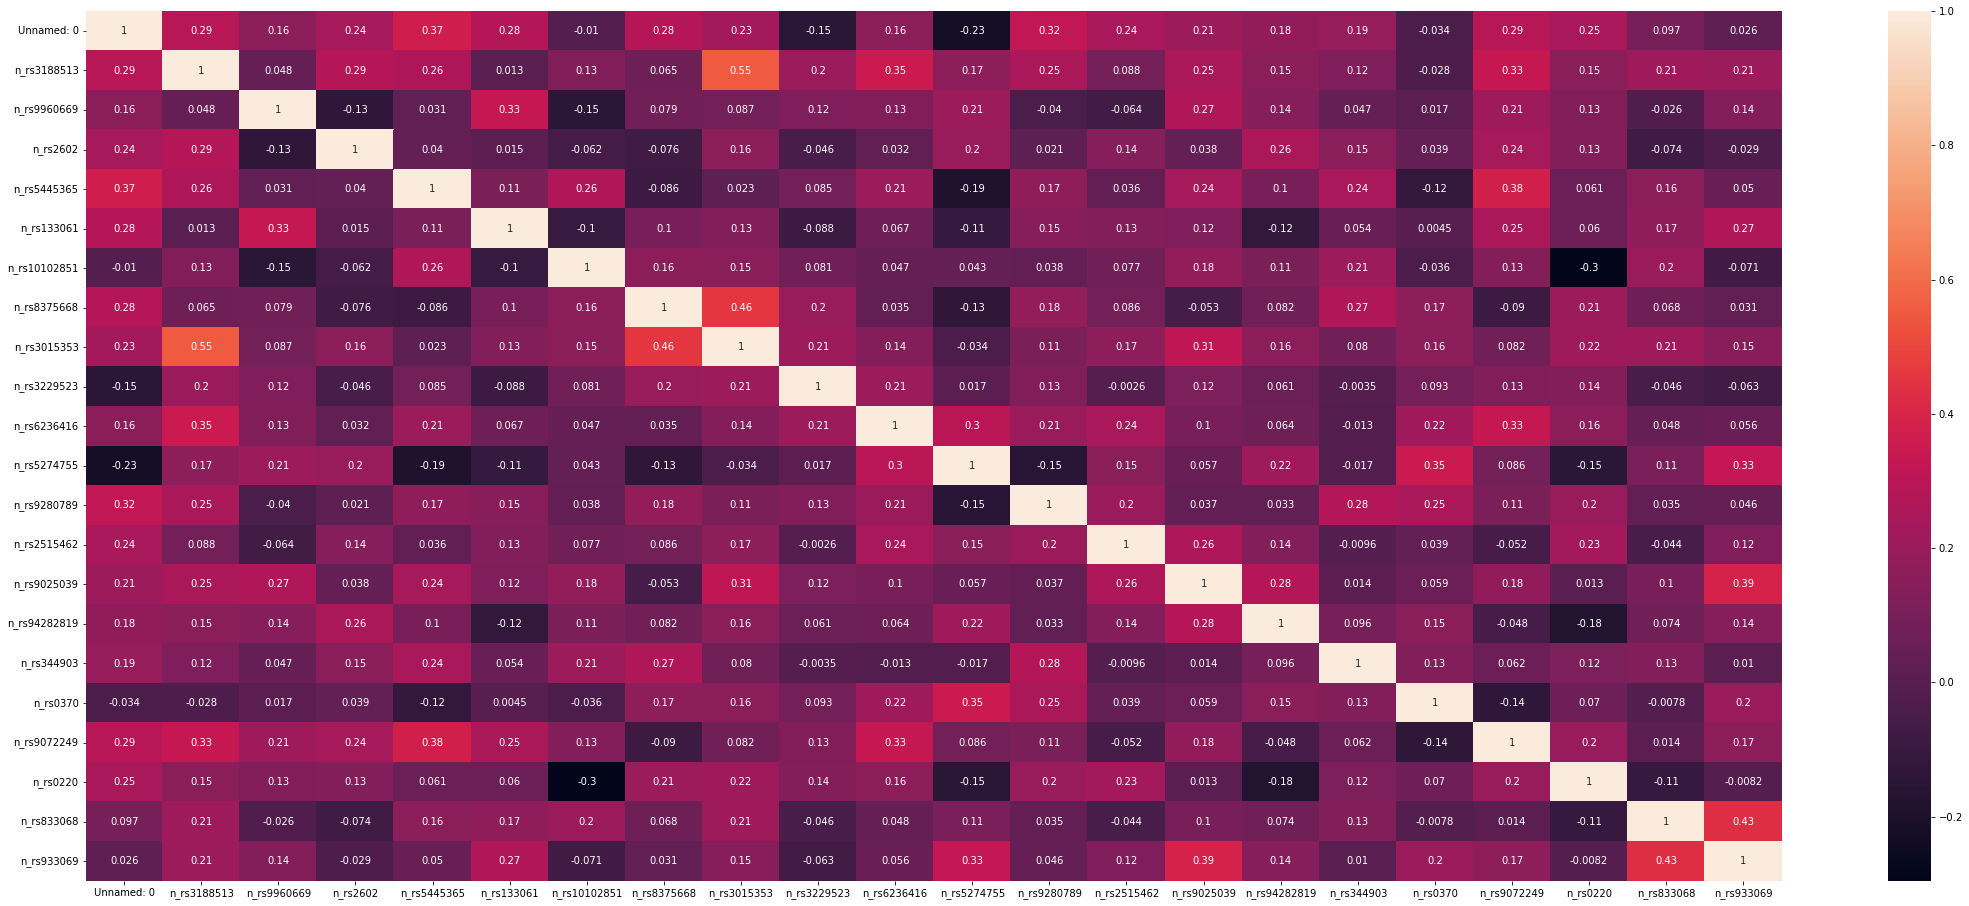

In [ ]:
plt.figure(figsize = (38,16))
sns.heatmap(df.corr(), annot = True)
plt.savefig('heatmap.png')
plt.show()

We note that our variables are poorly correlated, which is positive for continuing our comparative analyses. 

We will now perform the comparative study using the machine learning classifiers: Logistic Regression, Decision Trees, KNN, Random Forest and Multilayer Perceptron. For this, we follow the same workflow in all cases: split data into input and taget variable, preprocess the dataset, split the dataset into training and test data, build the classifier, make predictions and check accuracy of the predictions. 


##LOGISTIC REGRESION

Logistic regression is the appropriate regression analysis when the dependent variable is dichotomous (binary). Like all regression analyses, logistic regression is a predictive analysis. It is used to describe data and explain the relationship between a binary categorical dependent variable, and one or more nominal, ordinal, interval or ratio independent variables. In our case, predicting whether an individual will respond well or bad to the treatment based on its SNPs information. 


1. Split data into input and taget variable

After the data has been cleaned, the dataset columns can be separated into feature columns and target column. As mentioned before, the class column is the target column and everything else is a feature.

In [ ]:
X = df.iloc[:,df.columns != 'Target']
y = df.Target

2. Split the dataset into training and test data

Having done that, the dataset can be divided into training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5, stratify=y)

3. Preprocess the data

Before supplying the data to the classifier, the dataset is scaled using a standard scalar.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


4. Build the Logistic Regression Model

In [ ]:
model = LogisticRegression()
model

LogisticRegression()

5. Train the model

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

6. Evaluate the model

In [ ]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 94.87179487179486


Over 94.8% accuracy, which is pretty good, but training accuracy is not that useful, test accuracy is the real metric of success.

In [ ]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [ ]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 78.57142857142857


The accuracy of the test is over 78.5%, which is adequate for logistic regression.

7. Generate Classification Report

Classification report gives more information than simple accuracy measures. It tells about precision and recall as well.



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          NR       0.80      0.67      0.73         6
           R       0.78      0.88      0.82         8

    accuracy                           0.79        14
   macro avg       0.79      0.77      0.78        14
weighted avg       0.79      0.79      0.78        14



8. Visualizate using Confusion Matrix

Confusion Matrix also gives similar information to the classification report, but it is easier to understand. It shows how many values of each class were correctly or incorrectly classified.

In [ ]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

Four true negative predictions: The first three observations are zeros predicted correctly.

Two negative predictions: These are the ones wrongly predicted as zeros.

One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.

Seven true positive predictions: The last five observations are ones predicted correctly.

Finally, we can plot the ROC (Receiver Operating Characteristic) curve, which shows the percentage of true positives predicted by the model as the prediction probability threshold is reduced from 1 to 0.

The higher the AUC (area under the curve), the more accurate the model will be in predicting the results. We note that we obtain a value of 0.66 which indicates that it is a good method for predicting the correct outcome. 

In [ ]:
#define metrics
y_test = y_test.map({'R': 1, 'NR': 0}).astype(int)
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

9. CONCLUSIONS

We use a Logistic Regression in which the classification takes place at one of two possible values of the target variable. Logistic Regression is different from Linear Regression because it is a classification algorithm and has discrete values as classification output, whereas Linear Regression is a Regression algorithm that has continuous values as output. 
After exploring and preprocessing the data set, the model was trained and a classification accuracy of 78.5% was obtained. This tells us that the model made the correct prediction about whether an individual would respond well or not to treatment 78.5% of the time, which showed that Logistic Regression can be a good option for detecting good or poor response to treatment based on individuals' SNP information.  

## **DECISION** **TREES**

Decision trees work by dividing the data into a series of binary decisions. These decisions allow us to progress through the tree based on them until we end up at a leaf node, which will return the predicted classification.

1. Convert Target to Number

The classification algorithm’s in sklearn library cannot handle categorical (text) data. In our data, we have the Target variable which we have to convert to numerical format.

We will use the class LabelEncoder to convert Target to number.

In [ ]:
X = df.iloc[:,df.columns != 'Target']
X
labelEncoder_Target =  LabelEncoder()
y= labelEncoder_Target.fit_transform(y)
y


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0])

Thus individuals with good response to treatment, 'R'=1 and those without 'NR'=0. 

2. Split data into training and test set

We will use the train_test split method to split our data into training and testing set. We will use 25% data for testing purpose.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

3. Train the Decision Tree Classifier

We will use a scikit-learn decision tree classifier for classification.

In [ ]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In the above code we create our Decision Tree Classifier model and assign it to the variable clf. Then we apply the .fit() method to train the model. 

3. Make Predictions with Our Model

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[1 0 1 0 1]


We assign a new variable, predictions, which takes the values from applying the .predict() method to our clf model.
We make predictions based on our X_test data.
When we print the first five records of our predicted values, where 'R' represents that an individual has a good response to treatment, while an 'NR' indicates the opposite.


4. Validation

The accuracy_score() function measures the efficiency of the algorithms in proportion of 1. The accuracy score refers to the proportion of accurate predictions over the total of all predictions.


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)


[[7 0]
 [0 7]]
Accuracy score: 1.0
Precision score: 1.0
Recall score: 1.0


We have got 0 incorrect predictions and an accuracy score of 100%.From the results obtained, we can conclude that this model is not suitable for the analysis of our data. It seems that the model is over-fitted, so it would be advisable to use a different approach. In addition, it could be a high correlation with one of the features. To check how the splitting of a single feature affects the prediction of the decision tree model, let's use the model.feature_importances_ property to see how 'important' a feature is to the model prediction. 


5. Identify Important Features
Let's check the important features by using the feature_importances_ variable from the random forest algorithm in scikit-learn.

In [ ]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
0,Unnamed: 0,0.267011
8,n_rs3015353,0.137338
7,n_rs8375668,0.082625
1,n_rs3188513,0.072466
10,n_rs6236416,0.040937
17,n_rs0370,0.035392
6,n_rs10102851,0.035243
9,n_rs3229523,0.032501
4,n_rs5445365,0.032378
19,n_rs0220,0.029794


The figure above shows the relative importance of features and their contribution to the model. We can also visualize these features and their scores using the seaborn and matplotlib libraries.

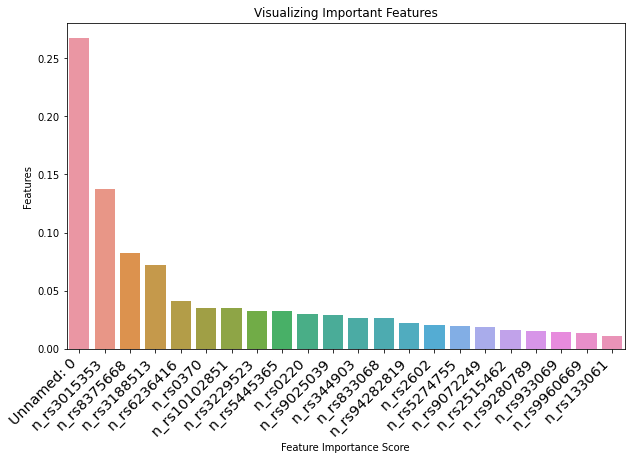

In [ ]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

From the figure above, you can see the n_rs133061 feature has low importance and does not contribute much to the prediction.

This means that we can remove this feature and train our random forest classifier again and then see if it can improve its performance on the test data.

In [ ]:
# load data with selected features
X = df.drop(["Target", "n_rs133061"], axis=1)
y = df["Target"]

# standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=42
)

In [ ]:
# Create a Decision Tree Classifier and train the model using the training sets
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(X_train, y_train)

# prediction on test set
y_pred = classifier.predict(X_test)

# Calculate Model Accuracy,
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)


[[2 1]
 [1 2]]
Accuracy score: 0.6666666666666666


Now the accuracy of the model has decreased from 100% to 66% after removing the least important feature called n_rs133061, which is generates a more realistic view of the model.

This suggests that it is very important to check the important features and see if the less important features can be removed to increase the model performance.

##**KNN**

In this case, we will have to convert the categorical variable 'Target' back to numbers. So we will start from the data transformed in the previous case. 

1. Split data into training and test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

2. Feature Scaling

For k Nearest Neighbor algorithm also we have to do feature scaling. We will use Standard Scaler for this purpose.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

3. Fit KNN Classifier

We are going to use the KNeighborsClassifier class from sklearn.neighbors library. When we create an object of this class, it takes many parameters.

Firstly, we have to specify the number of neighbors. In our example, let’s select 5.

Then we have to define which distance method we want to use.

For Euclidean distance we have to specify metric as minkowski and p=2
For Manhattan distance we have to specify metric as minkowski and p=1
Let's use the Euclidean distance.

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric="minkowski",p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

4. Make Predictions

In [ ]:
y_pred = classifier.predict(X_test)

5. Check Accuracy of the Predictions

Let's compare the predicted results with the actual results using the confusion matrix.

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[5 2]
 [2 5]]
Accuracy score: 0.7142857142857143
Precision score: 0.7142857142857143
Recall score: 0.7142857142857143


We get an accuracy of 71%.

And only a total of 4 (2+2) incorrect predictions were made.

##**RANDOM** **FOREST**

Random forest can be used to solve both classification and regression problems. Random forest tends to combine hundreds of decision trees and then trains each decision tree on a different sample of the observations.The final predictions of the random forest are made by averaging the predictions of each individual tree.


1. Split data into input and taget variable

In this case, we can again use categorical variables. We divide the data set into independent features and target features. Our target feature for this data set will again be 'Target'. 


In [ ]:
X = df.iloc[:,df.columns != 'Target']
y = df.Target


2. Preproces the Dataset

Before we create a model we need to standardize our independent features by using the standardScaler method from scikit-learn.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Split the dataset into Training and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.25, random_state=42
)

4. Building the Random Forest Classifier

Now is time to create our random forest classifier and then train it on the train set. We will also pass the number of trees (100) in the forest we want to use through the parameter called n_estimators.

In [ ]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

5. Make Predictions

In [ ]:
y_pred = classifier.predict(X_test)

6. Check Accuracy of the Predictions

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7857142857142857


##**Multilayer** **Perceptron**

1. Split data into input and taget variable


In [ ]:
X = df.iloc[:,df.columns != 'Target']
y = df.Target


2. Preproces the Dataset

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Split the dataset into Training and Test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.25, random_state=42
)

4. Building the Multilayer Perceptron Classifier

In [ ]:
m1 = MLPClassifier(hidden_layer_sizes=(12, 13, 14), activation='relu', solver='adam', max_iter=2500)
m1.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(12, 13, 14), max_iter=2500)

5. Make Predictions

In [ ]:
predicted_values = m1.predict(X_test)

6. Check Accuracy of the Predictions

In [ ]:
print(confusion_matrix(y_test,predicted_values))

[[5 1]
 [3 5]]


In [ ]:
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

          NR       0.62      0.83      0.71         6
           R       0.83      0.62      0.71         8

    accuracy                           0.71        14
   macro avg       0.73      0.73      0.71        14
weighted avg       0.74      0.71      0.71        14



We get an accuracy of 71%.

And only a total of 4 (3+1) incorrect predictions were made.

##**MODEL** **COMPARISON**

Once the independent analysis of each of the models has been carried out, identifying and explaining each of the steps involved, we then carry out a comparative analysis of the models as a whole, representing each of the results obtained by means of a boxplot graph. 
Running the code provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy. 
Results may vary due to the stochastic nature of the algorithm or the evaluation procedure, or to differences in numerical accuracy, so let's run it three times and compare the average result.


In [ ]:
# Load the data.
df = pd.read_csv('/content/dataset15.csv')
X = df.iloc[:,df.columns != 'Target']
y = df.Target

# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('MP', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.763333 (0.234023)
KNN: 0.880000 (0.160000)
CART: 0.820000 (0.274955)
RF: 0.723333 (0.241316)
MP: 0.633333 (0.311983)


In [ ]:
# Load the data.
df = pd.read_csv('/content/dataset15.csv')
X = df.iloc[:,df.columns != 'Target']
y = df.Target

# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('MP', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.763333 (0.234023)
KNN: 0.880000 (0.160000)
CART: 0.800000 (0.322490)
RF: 0.760000 (0.215407)
MP: 0.600000 (0.287904)


In [ ]:
# Load the data.
df = pd.read_csv('/content/dataset15.csv')
X = df.iloc[:,df.columns != 'Target']
y = df.Target

# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('MP', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10)
 cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.763333 (0.234023)
KNN: 0.880000 (0.160000)
CART: 0.800000 (0.322490)
RF: 0.760000 (0.215407)
MP: 0.693333 (0.306159)


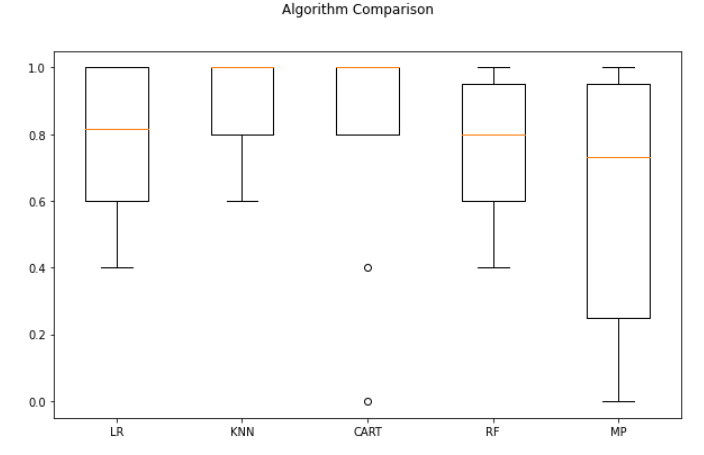

# **FINAL** **CONCLUSIONS**

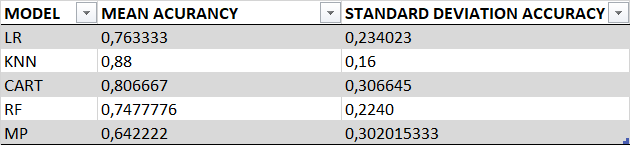

After taking the same parameters to compare each of the models, we observed a higher mean accurancy for the KNN model followed by Decision Tree, Logistic Regression, Random Forest, and Multilayer Perceptron model. 